<a href="https://colab.research.google.com/github/maferrepy/risco-de-credito/blob/main/risco_credito_arvore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install plotly --upgrade

     |████████████████████████████████| 15.2 MB 4.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df_credit = pd.read_csv('/content/drive/MyDrive/Dado_csv/Cópia de credit_data.csv')

In [4]:
df_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


Adaptando Data frame por client,incom, age,loan e  default.

In [5]:
df_credit.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

"
'idade da pessoa', 'renda pessoal', 'propriedade da casa pessoal',
       'comprimento do emp da pessoa', 'intenção de empréstimo', 'grau do empréstimo', 'valor do empréstimo',
       'taxa int do empréstimo', 'status do empréstimo', 'receita percentual do empréstimo',
       'cb person default on file', 'cb person cred hist length"

In [6]:
#Criando coluna Client no data frame

In [7]:
df_credit = df_credit.rename_axis('Client')

In [8]:
df_credit

,clientid,income,age,loan,default
Client,,,,,
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1


In [9]:
df_credit.shape

(2000, 5)

In [10]:
df_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [11]:
df_credit[df_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
Client,,,,,
865,866,28072.604355,54.142548,1.37763,0


In [12]:
np.unique(df_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

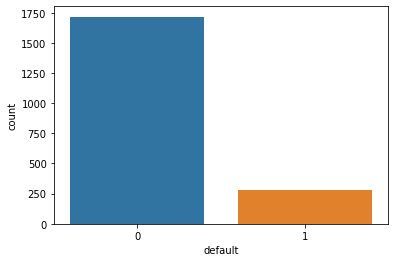

In [13]:
sns.countplot(x = df_credit['default']);

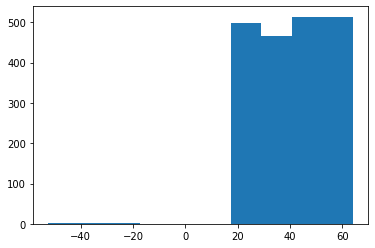

In [14]:
plt.hist(x=df_credit['age']);

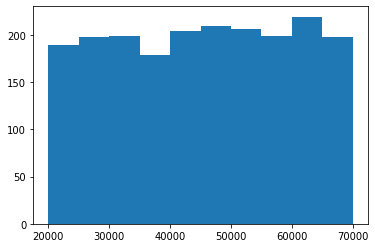

In [15]:
plt.hist(df_credit['income']);

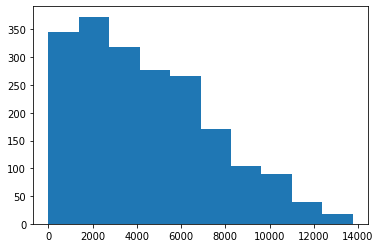

In [16]:
plt.hist(x = df_credit['loan']);

In [17]:
grafico = px.scatter_matrix(df_credit,dimensions=['age','income',"loan"],color='default')
grafico

In [18]:
df_credit.loc[df_credit['age']<0]

,clientid,income,age,loan,default
Client,,,,,
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [19]:
#APAGAR A COLUNA INTEIRA DA BASE DE DADOS
df2 = df_credit.drop('age',axis =1)
df2.head()

,clientid,income,loan,default
Client,,,,
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1


In [20]:
df3 = df_credit.drop(df_credit[df_credit['age']< 0].index)
df3.describe()


,clientid,income,age,loan,default
count,1997.000000,1997.000000,1994.000000,1997.000000,1997.000000
mean,1001.970456,45326.596720,40.927700,4442.124566,0.141713
std,576.679293,14327.971550,13.271802,3045.494192,0.348842
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,503.000000,32804.904487,29.043284,1936.813257,0.000000
50%,1002.000000,45788.747100,41.382673,3971.155479,0.000000
75%,1501.000000,57787.565659,52.616900,6429.593688,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [21]:
#preecher media
df3.mean()

clientid     1001.970456
income      45326.596720
age            40.927700
loan         4442.124566
default         0.141713
dtype: float64

In [22]:
grafico = px.scatter_matrix(df3,dimensions=['age','income',"loan"],color='default')
grafico

In [23]:
df3.isna().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [24]:
df3.loc[pd.isnull(df3['age'])]

,clientid,income,age,loan,default
Client,,,,,
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [25]:
df3['age'].fillna(df3['age'].mean(),inplace=True)

In [26]:
df3.loc[(df3['clientid'] ==29)|(df3['clientid'] ==31)| (df3['clientid'] ==32)]

,clientid,income,age,loan,default
Client,,,,,
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [27]:
df3.loc[df3['clientid'].isin([29,31,320])]

,clientid,income,age,loan,default
Client,,,,,
28,29,59417.805406,40.927700,2082.625938,0
30,31,48528.852796,40.927700,6155.784670,0
319,320,27789.519057,58.519133,186.828074,0


In [28]:
x_df3 = df3.iloc[:,1:4].values

In [29]:
x_df3

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [30]:
type(x_df3)

numpy.ndarray

In [31]:
y_df3 = df3.iloc[:, 4].values
type(y_df3)

numpy.ndarray

In [32]:
x_df3[:, 0].max(), x_df3[:,1].max(), x_df3[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [33]:
x_df3[:, 0].min(), x_df3[:,1].min(), x_df3[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [34]:
#padronizaçao dos dados

In [35]:
from sklearn.preprocessing import StandardScaler
scaler_df3 = StandardScaler()
x_df3 = scaler_df3.fit_transform(x_df3)

In [36]:
x_df3[:, 0].min(), x_df3[:,1].min(), x_df3[:,2].min()

(-1.7670643102584795, -1.7251201169997261, -1.4585019468665543)

In [37]:
x_df3[:, 0].max(), x_df3[:,1].max(), x_df3[:,2].max()

(1.7221745332636433, 1.7380615056973787, 3.062314831209601)

In [38]:
x_df3

array([[ 1.45411689,  1.36435564,  1.20352401],
       [-0.76173907,  0.54225218,  0.69714535],
       [ 0.83707429,  1.67291491,  1.17541683],
       ...,
       [-0.07086849, -0.97375493,  0.35492854],
       [-0.10964103,  1.73806151, -0.9259936 ],
       [ 1.68314276,  1.14831331,  0.96452149]])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [40]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_df3, y_df3,test_size=0.25, random_state=0)

In [41]:
x_credit_treinamento.shape, y_credit_treinamento.shape,y_credit_treinamento.shape

((1497, 3), (1497,), (1497,))

In [42]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_df3, y_df3,test_size=0.15, random_state=0)

In [43]:
import pickle

In [44]:
with open('Credit.pkl', mode = 'wb') as f:
  pickle.dump([x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste],f )

In [49]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [51]:
y_credit_teste

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [55]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [54]:
accuracy_score(y_credit_teste, previsoes)

0.9733333333333334

0.9733333333333334

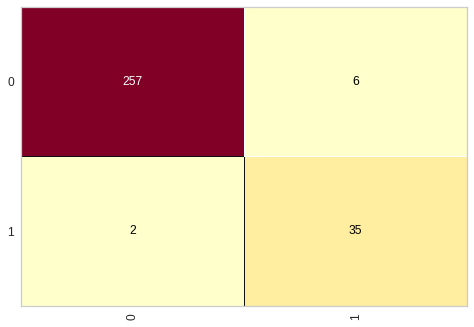

In [56]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste,y_credit_teste)


In [57]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       263
           1       0.85      0.95      0.90        37

    accuracy                           0.97       300
   macro avg       0.92      0.96      0.94       300
weighted avg       0.98      0.97      0.97       300



In [59]:
from sklearn import tree


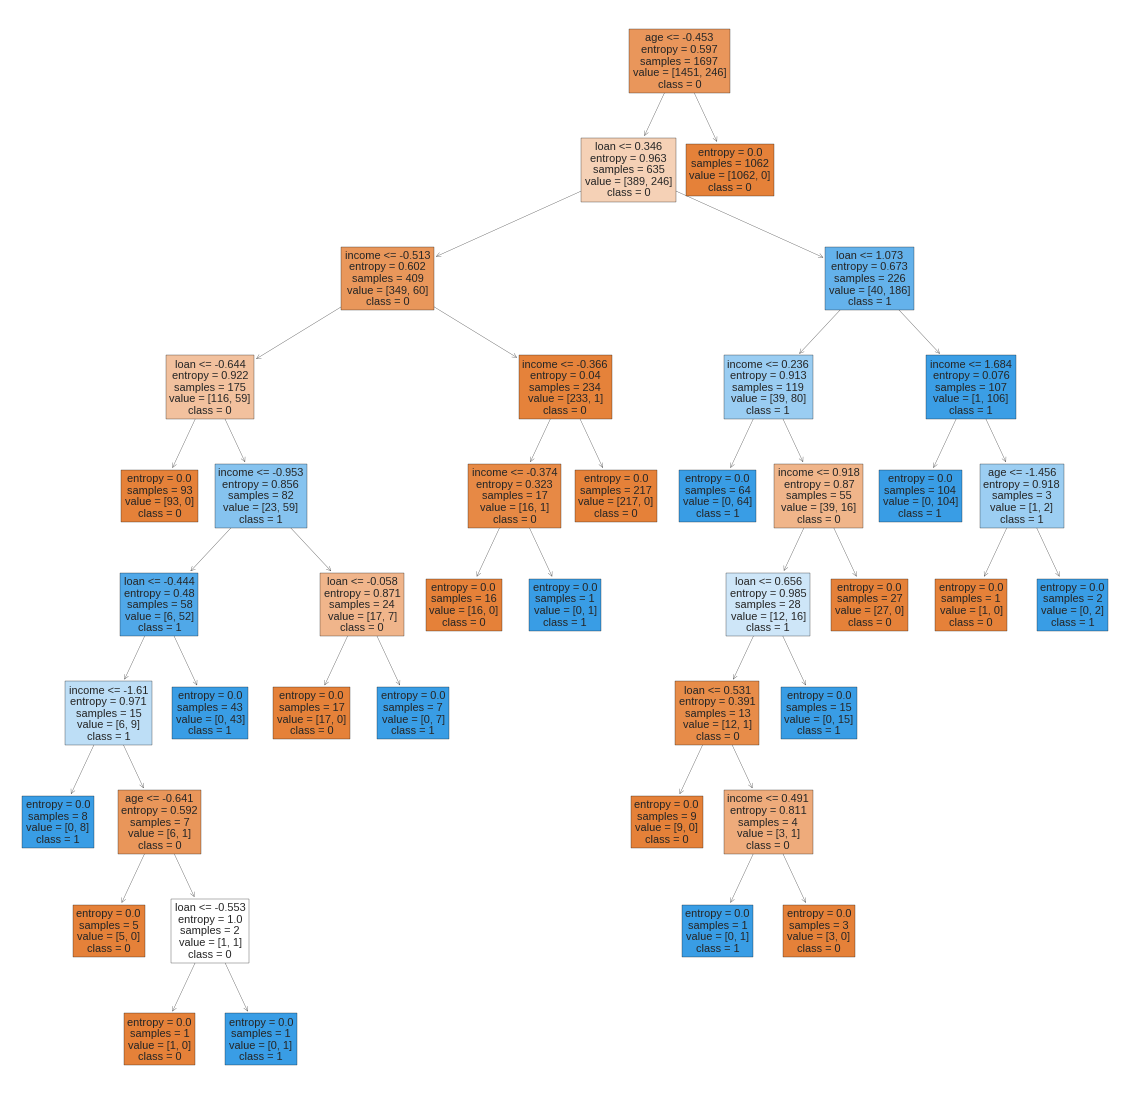

In [70]:
from IPython.core.pylabtools import figsize
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols= 1, figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names= ['0','1'], filled = True);
fig.savefig('arvore_credit.png')

